# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('Base_M14_Tratada.csv', delimiter=',')

df.head(10)

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,female,0,yes,no,1,no,dsl,no,no,no,month-to-month,electronic check,29.850000,29.85,no
1,male,0,no,no,34,yes,dsl,yes,no,no,one year,mailed check,56.950000,1889.50,no
2,male,0,no,no,2,yes,dsl,yes,no,no,month-to-month,mailed check,53.850000,108.15,yes
3,male,0,no,no,45,no,dsl,yes,yes,no,one year,bank transfer (automatic),65.607563,1840.75,no
4,female,0,no,no,52,yes,no,no internet service,no internet service,no internet service,one year,mailed check,65.607563,1022.95,no
5,male,0,no,yes,71,yes,fiber optic,yes,no,yes,two year,bank transfer (automatic),65.607563,7382.25,no
6,female,0,yes,yes,10,yes,dsl,no,yes,no,month-to-month,credit card (automatic),65.607563,528.35,yes
7,female,0,no,no,21,yes,fiber optic,no,no,no,month-to-month,electronic check,65.607563,1862.90,no
8,male,1,no,no,1,no,dsl,no,no,no,month-to-month,electronic check,65.607563,39.65,yes
9,male,0,yes,no,12,yes,no,no internet service,no internet service,no internet service,one year,bank transfer (automatic),65.607563,202.25,no


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [3]:
#Seu código aqui
# A)
df.describe()

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,65.607563,2290.087178
std,0.368135,24.636885,27.984700,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.400000,402.337500
50%,0.000000,29.000000,65.607563,1402.900000
75%,0.000000,56.000000,87.712500,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


In [ ]:
# Temos 4 variáveis quantitativas, sendo uma delas, 'idoso', booleana.
# Não é usual analisar variáveis booleanas nessa etapa, mas, à primeira vista, é possível observar que a maioria dos clientes não são idosos, devido à distribuição dos dados.
# Inicialmente observamos que o 'Tempo_Como_Cliente' tem média e mediana relativamente parecidoas, sendo 32,35 e 29, respectivamente.
# 'Pagamento_Mensal' tem a mesma característica, sendo a média e mediana iguais, 65,6.
# Já no 'Total_Pago' pode-se observar que há uma grande diferença entre a média, 2290, e a mediana, 1402.

In [ ]:
# B)
# É possível identificar que a coluna 'Total_Pago' possui um grande diferença nos valores da média e mediana. O que pode indicar que haja outliers.

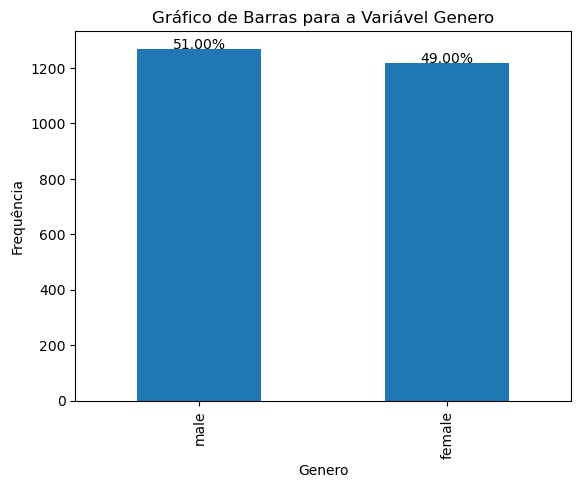

In [28]:
# C)
# Distribuição de clientes por gênero:
contagem_genero = df['Genero'].value_counts()
porcentagem_genero = (contagem_genero / contagem_genero.sum()) * 100

ax = contagem_genero.plot(kind='bar')

for i, v in enumerate(contagem_genero):
    ax.text(i, v + 1, f'{porcentagem_genero.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Genero')
plt.xlabel('Genero')
plt.ylabel('Frequência')

plt.show()

# Observa-se que a variável gênero é bem equilibrada, temos uma quantidade muito semelhante de clientes homens e mulheres

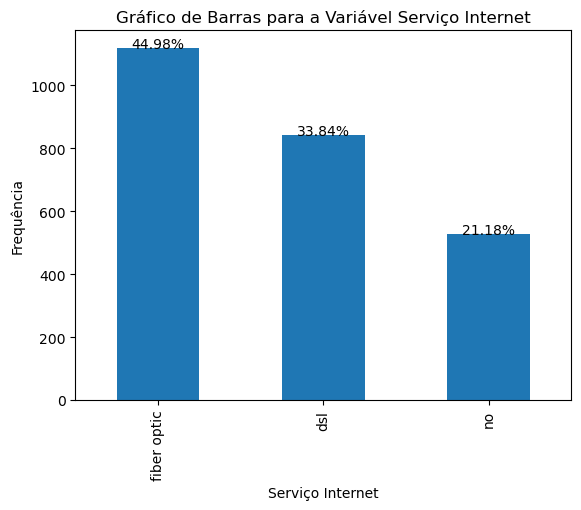

In [27]:
# Análise dos principais serviços de internet contratados
contagem_internet = df['Servico_Internet'].value_counts()
porcentagem_internet = (contagem_internet / contagem_internet.sum()) * 100

ax = contagem_internet.plot(kind='bar')

for i, v in enumerate(contagem_internet):
    ax.text(i, v + 1, f'{porcentagem_internet.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Serviço Internet')
plt.xlabel('Serviço Internet')
plt.ylabel('Frequência')

plt.show()

# Observa-se que o principal serviço de internet contratado é fibra óptica, 44,98%, em seguida DSL, 33,84%. Em contrapartida, 21,18% dos clientes não contrataram serviço de internet

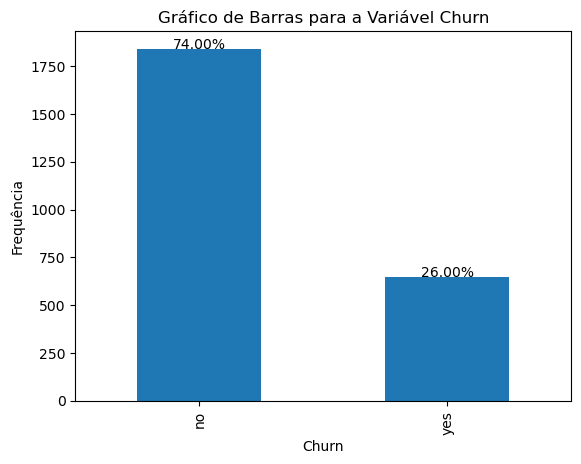

In [29]:
# Análise do percentual de clientes que dão churn
contagem_churn = df['Churn'].value_counts()
porcentagem_churn = (contagem_churn / contagem_churn.sum()) * 100

ax = contagem_churn.plot(kind='bar')

for i, v in enumerate(contagem_churn):
    ax.text(i, v + 1, f'{porcentagem_churn.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Churn')
plt.xlabel('Churn')
plt.ylabel('Frequência')

plt.show()

# Observa-se que aproxidamente um quarto dos clientes, 26%, dão churn.

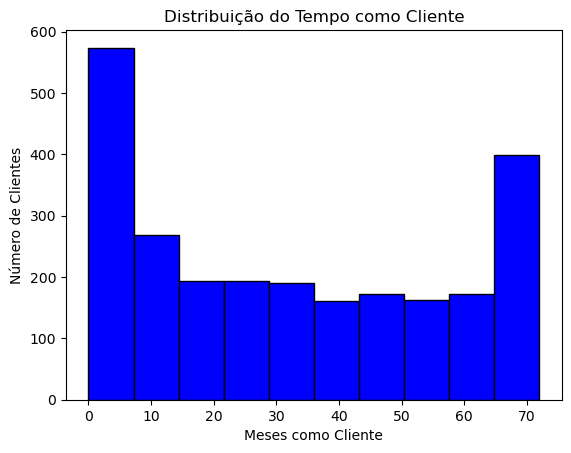

In [31]:
# Análise da distribuição do tempo como cliente
plt.hist(df['Tempo_como_Cliente'], bins=10, color='blue', edgecolor='black')
plt.title('Distribuição do Tempo como Cliente')
plt.xlabel('Meses como Cliente')
plt.ylabel('Número de Clientes')
plt.show()

# O gráfico traz um resultado interessante, o número de clientes de 20 a 60 meses é muito semelhante. Contudo, é possível observar concentração no número de clientes novos.

# Outro fato interessante, é que há um grande número de clientes com mais de 60 meses de utilização dos serviços. 

# Isso indica um êxito na manutenção de clientes antigos e também que a empresa está conseguindo conquistar novos clientes.

In [ ]:
# D)
# Das nosas 6 variáveis booleanas: 'Genero', 'Idoso', 'Casado', 'Dependentes', 'Servico_Telefone' e 'Churn'. Já abordamos 2 no exercício anterior: 'Genero' e 'Churn', portanto agora iremos analisar as 4 restantes

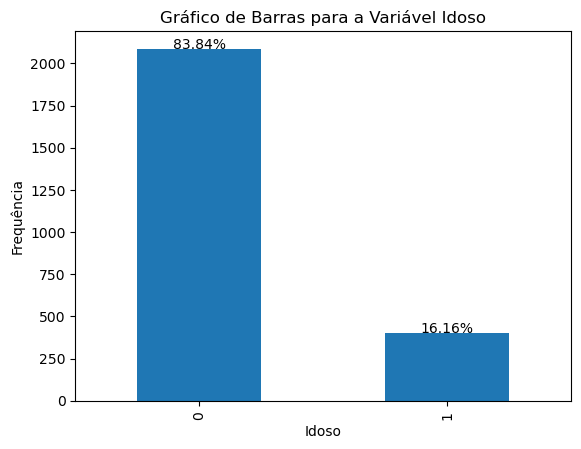

In [33]:
# Variável Idoso
contagem_idoso = df['Idoso'].value_counts()
porcentagem_idoso = (contagem_idoso / contagem_idoso.sum()) * 100

ax = contagem_idoso.plot(kind='bar')

for i, v in enumerate(contagem_idoso):
    ax.text(i, v + 1, f'{porcentagem_idoso.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Idoso')
plt.xlabel('Idoso')
plt.ylabel('Frequência')

plt.show()

# Pode-se concluir a maior parte dos clientes, 83,84%, não são idosos.

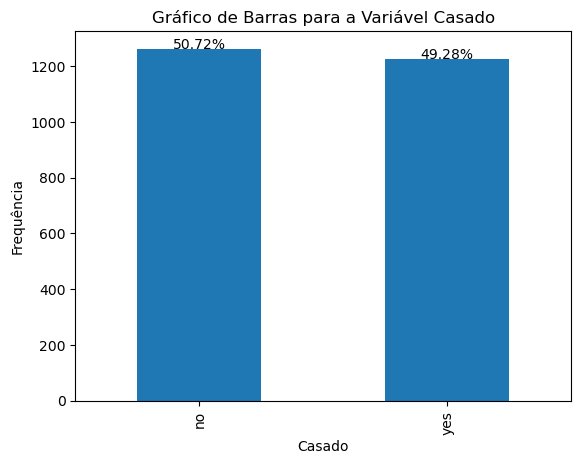

In [34]:
# Variável Casado
contagem_casado = df['Casado'].value_counts()
porcentagem_casado = (contagem_casado / contagem_casado.sum()) * 100

ax = contagem_casado.plot(kind='bar')

for i, v in enumerate(contagem_casado):
    ax.text(i, v + 1, f'{porcentagem_casado.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Casado')
plt.xlabel('Casado')
plt.ylabel('Frequência')

plt.show()

# Pode-se observar que a distribuição de clientes casados e não casados é bem equilibrada.

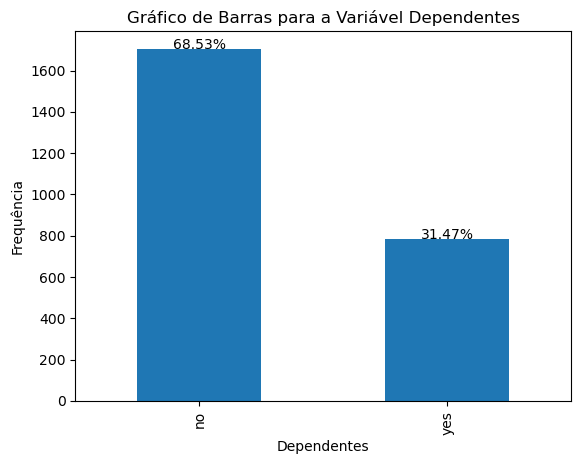

In [36]:
# Variável Dependentes
contagem_dependentes = df['Dependentes'].value_counts()
porcentagem_dependentes = (contagem_dependentes / contagem_dependentes.sum()) * 100

ax = contagem_dependentes.plot(kind='bar')

for i, v in enumerate(contagem_dependentes):
    ax.text(i, v + 1, f'{porcentagem_dependentes.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Frequência')

plt.show()

# É possível observar que a maioria dos clientes não são dependentes, 68,53%.

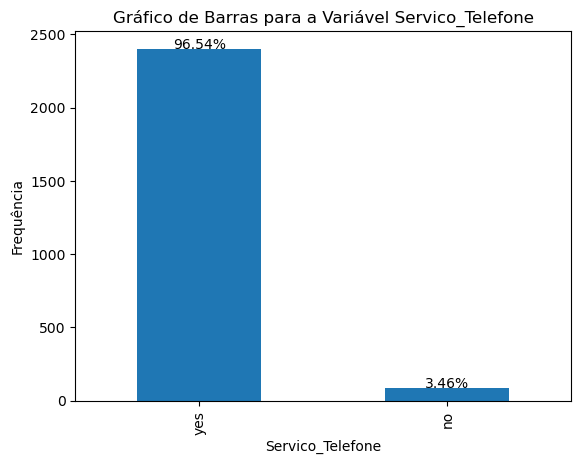

In [38]:
# Variável Servico_Telefone
contagem_servico_telefone = df['Servico_Telefone'].value_counts()
porcentagem_servico_telefone = (contagem_servico_telefone / contagem_servico_telefone.sum()) * 100

ax = contagem_servico_telefone.plot(kind='bar')

for i, v in enumerate(contagem_servico_telefone):
    ax.text(i, v + 1, f'{porcentagem_servico_telefone.iloc[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Servico_Telefone')
plt.xlabel('Servico_Telefone')
plt.ylabel('Frequência')

plt.show()

# Conclui-se que a grande maioria dos clientes contrataram serviço de telefone, aproximadamente 96,5%.

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


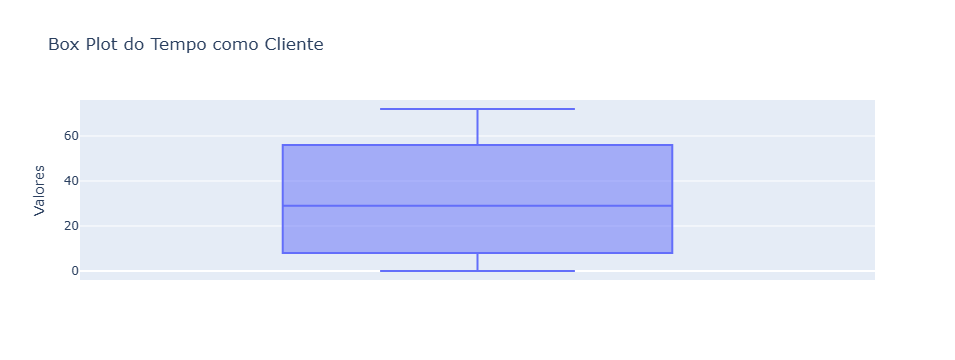

In [46]:
#Seu código aqui
# Vamos verificar se há outliers na variável Tempo_como_Cliente
fig = px.box(df, y='Tempo_como_Cliente', title='Box Plot do Tempo como Cliente', labels={'Tempo_como_Cliente': 'Valores'})
fig.show()

# Não aparenta haver outliers

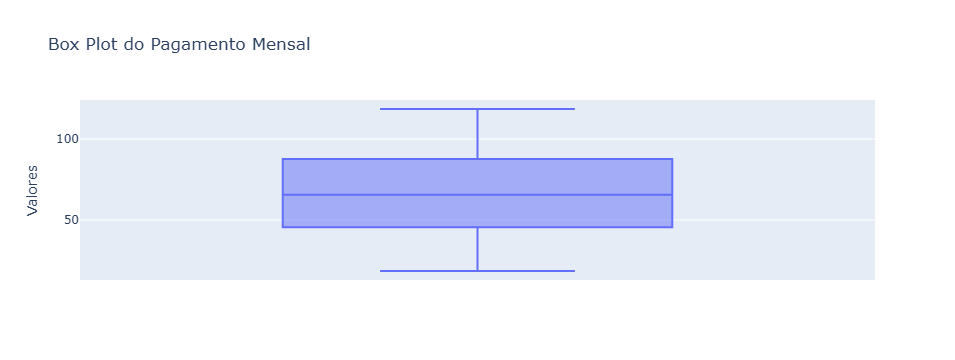

In [47]:
# Em seguida, vamos analisar na variável Pagamento_Mensal
fig = px.box(df, y='Pagamento_Mensal', title='Box Plot do Pagamento Mensal', labels={'Pagamento_Mensal': 'Valores'})
fig.show()

# Essa variável também aparenta não ter outliers

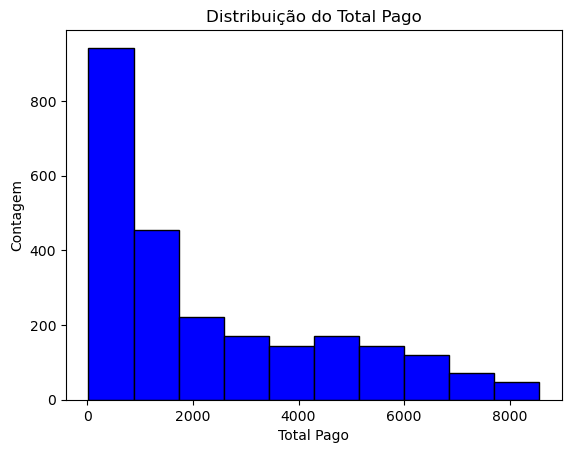

In [40]:
# Na questão 2 suspeitamos de que na variável 'Total_Pago' possa conter outliers, vamos testar essa hipótese.
# Primeiramente vamos analisar a distribuição dessa variável
plt.hist(df['Total_Pago'], bins=10, color='blue', edgecolor='black')
plt.title('Distribuição do Total Pago')
plt.xlabel('Total Pago')
plt.ylabel('Contagem')
plt.show()

# Pode-se observar que a maior parte dos clientes tem um valor total já pago de até 2000.

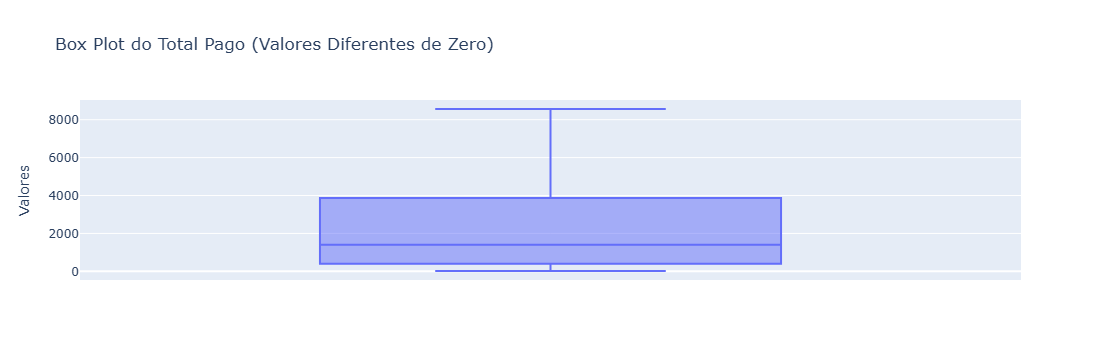

In [50]:
df_nao_zero = df[df['Total_Pago'] != 0]
fig = px.box(df_nao_zero, y='Total_Pago', title='Box Plot do Total Pago (Valores Diferentes de Zero)', labels={'Total_Pago': 'Valores'})
fig.show()

In [54]:
# A partir dos gráficos não foi possível identificar nenhum outlier nessa coluna, vamos utilizar o IQR para fazer mais uma busca.
Q1 = df['Total_Pago'].quantile(0.25)
Q3 = df['Total_Pago'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Total_Pago'] < lower_bound) | (df['Total_Pago'] > upper_bound)]
print(outliers)

# Não foram encontrados outliers para a variável Total_Pago

Empty DataFrame
Columns: [Genero, Idoso, Casado, Dependentes, Tempo_como_Cliente, Servico_Telefone, Servico_Internet, Servico_Seguranca, Suporte_Tecnico, StreamingTV, Tipo_Contrato, Metodo_Pagamento, Pagamento_Mensal, Total_Pago, Churn, Z_Score]
Index: []


# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

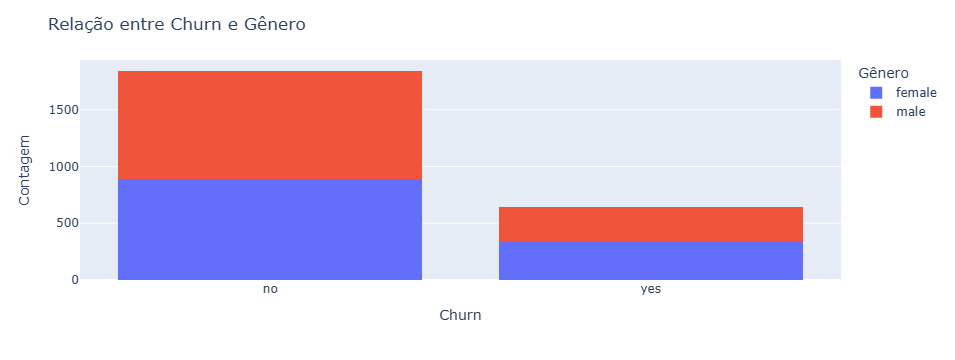

In [55]:
#Seu código aqui
# Questão 1: Mulheres são mais propensas a churn que homens?
fig = px.histogram(df, x='Churn', color='Genero', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Churn e Gênero',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Gênero')
fig.show()

# Não parece haver relação entre churn e gênero

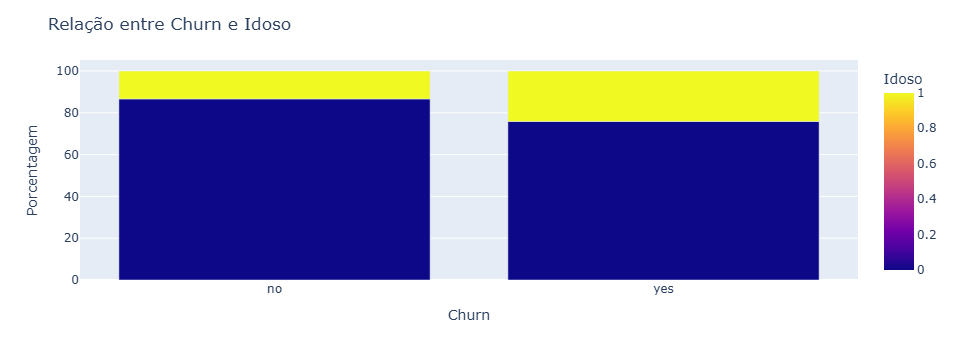

In [57]:
# Questão 2: Idosos são mais propensos a churn?
df_grouped = df.groupby(['Churn', 'Idoso']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='Idoso', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Idoso': 'Idoso'})

fig.update_layout(title='Relação entre Churn e Idoso',
                  yaxis_title='Porcentagem',
                  legend_title='Idoso')
fig.show()
# Na questão anterior temos que os idosos representam 16,16% dos clientes
# Dos clientes que não deram churn 13,36% eram idosos. Já nos clientes que deram churn 24,11% eram idosos. O que pode indicar uma leve tendência de idosos derem mais churn.

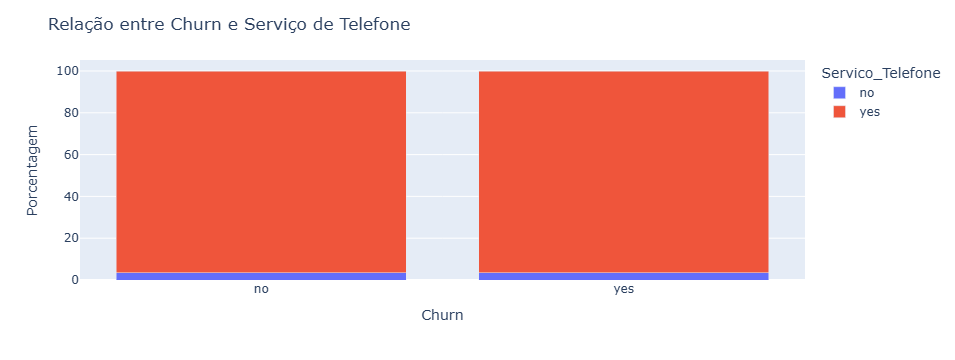

In [62]:
# Questão 3: O cliente possuir serviço de telefone pode fazer com que diminua a chance de churn?
df_grouped = df.groupby(['Churn', 'Servico_Telefone']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='Servico_Telefone', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Servico_Telefone': 'Servico_Telefone'})

fig.update_layout(title='Relação entre Churn e Serviço de Telefone',
                  yaxis_title='Porcentagem',
                  legend_title='Servico_Telefone')

# A partir do gráfico compreende-se que não há diferença no churn em relação a possuir ou não um serviço de telefone.

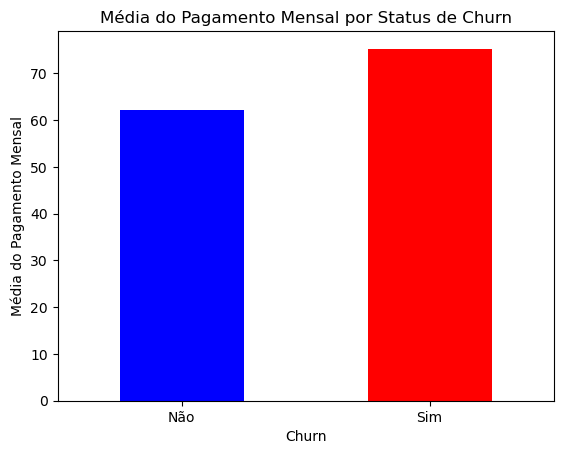

In [67]:
# Questão 4: Clientes que pagam mensalmente mais têm maior tendência de dar churn?
df.groupby('Churn')['Pagamento_Mensal'].mean().plot(kind='bar', color=['blue', 'red'])
plt.title('Média do Pagamento Mensal por Status de Churn')
plt.xlabel('Churn')
plt.ylabel('Média do Pagamento Mensal')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'], rotation=0)
plt.show()

# É possível observar que a média de pagamento mensal dos clientes que deram churn é superior à dos clientes que não deram churn.
# Portanto, pode-se afirmar que quanto maior o pagamento mensal, maior a chance do cliente abandonar o serviço.

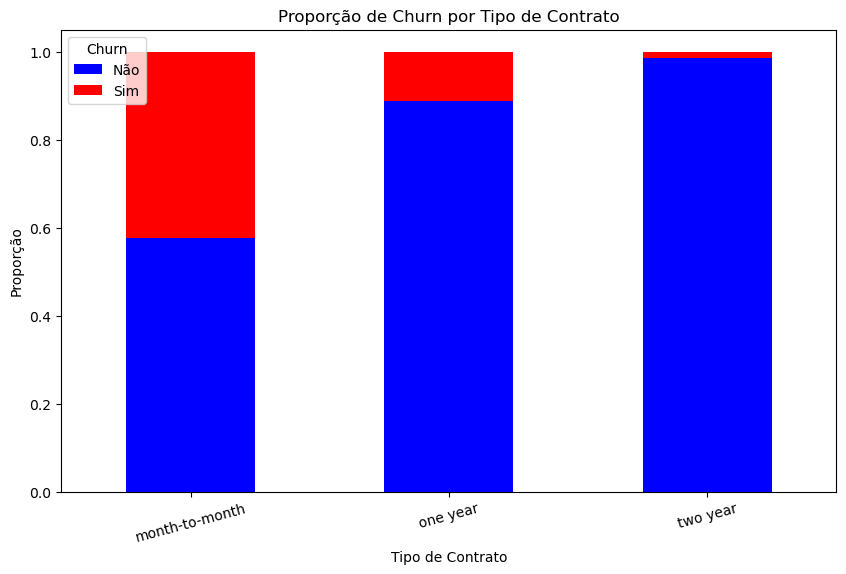

In [69]:
# Questão 5: O tipo de contrato é capaz de manter os clientes por mais tempo?
df_prop = df.groupby('Tipo_Contrato')['Churn'].value_counts(normalize=True).unstack()

df_prop.plot(kind='bar', stacked=True, color=['blue', 'red'], figsize=(10,6))
plt.title('Proporção de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporção')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.xticks(rotation=15)
plt.show()

# É possível observar que os clientes como tipo de contrato mês a mês têm a maior probabilidade de dar churn. Já os clientes com contrato de dois anos são os menos propensos a dar churn.

In [ ]:
# Conforme observamos na análise da questão 4, as variáveis Tipo_Contrato, Pagamento_Mensal e Idoso são importantes par